<a href="https://colab.research.google.com/github/wallisonferreira/Algoritmos_NB_e_SVM/blob/main/algoritmos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalação de módulos não-padrão

In [ ]:
!pip install csv
!pip install snscrape

!pip install spacy
!python -m spacy download pt_core_news_sm

In [ ]:
!pip install deep_translator

### Importação de módulos

In [4]:
import pandas as pd
import numpy as np
import csv
import snscrape.modules.twitter as sntwitter
import uuid

# Coleta de dados

### Declara uma função para coletar tweets

<blockquote><p>collect_tweets(número de tweets, termo a ser pesquisado, data inicial, data final)
</blockquote>

#### Exemplo:

* numberOfTweets=100, 
* term='Covid-19', 
* since='2022-12-01', 
* until='2022-12-02'

In [7]:
def collect_tweets(
    numberOfTweets=100, 
    term='', 
    since='2022-12-01', 
    until='2022-12-02',
    filename=''):

    # cria um arquivo de tabulação csv
    if (filename == ''):
        # cria um identificador único
        # para evitar sobrescrição de arquivo
        uuidOne = str(uuid.uuid1())
        uuidOne = uuidOne[2:6] + uuidOne[7:8]
        csvFile = open('dataset_{}.csv'.format(uuidOne), 'a')
    else:
        uuidOne = str(uuid.uuid1())
        uuidOne = uuidOne[2:6] + uuidOne[7:8]
        csvFile = open('{}_{}.csv'.format(filename, uuidOne), 'a')
    
    csvWriter = csv.writer(csvFile)

    # define um array de colunas para o cabeçalho
    cols=[
        'datetime',
        'tweet_id',
        'text',
        'language',
        'created_at'
    ]

    # cria um cabeçalho no arquivo
    csvWriter.writerow(cols)

    # define o máximo de tweets a ser coletado
    maxTweets = numberOfTweets

    # itera sobre cada tweet e insere no arquivo
    for i,tweet in enumerate(
        sntwitter.TwitterSearchScraper(
            '{} since:{} until:{}'.format(term, since, until)
        ).get_items()) :
            if i > maxTweets :
                break
            
            model = [
                tweet.date, 
                tweet.id, 
                tweet.content.encode('utf-8'), 
                tweet.lang,
                tweet.user.created,
            ]

            print(tweet.date, '-', i , ' collected')
            csvWriter.writerow(model)

### Exemplo de coleta de tweets

In [ ]:
collect_tweets(1000, 'metaverso', filename="metaverso")

# Pré-processamento

### importa os dados coletados

In [13]:
# importa e atribui à variável df
df = pd.read_csv('/content/drive/MyDrive/Trabalho Mestrado Python/metaverso_65fa0.csv')

# mostra os 5 primeiros
df.head()

,datetime,tweet_id,text,language,created_at
0,2022-12-01 23:59:46+00:00,1598466920881475584,b'@EdSchramer @AndreJanonesAdv Viu o que Renan...,pt,2016-06-14 11:52:17+00:00
1,2022-12-01 23:59:45+00:00,1598466917756452867,b'@nayibbukele Ooooo drilling for more power \...,en,2017-04-09 07:10:16+00:00
2,2022-12-01 23:59:34+00:00,1598466869622628352,b'Los NFT de Playboy Party People est\xc3\xa1n...,es,2010-01-18 04:38:34+00:00
3,2022-12-01 23:59:11+00:00,1598466774135369728,"b'gente, cuidado pra n\xc3\xa3o esquecer da su...",pt,2022-06-12 01:09:13+00:00
4,2022-12-01 23:58:53+00:00,1598466695848419328,"b""\xc2\xabLa naturaleza aborrece el vac\xc3\xa...",es,2022-05-12 12:44:48+00:00


In [15]:
# remove duplicatas
df.drop_duplicates("tweet_id", inplace=True)
df.drop_duplicates("text", inplace=True)
df.shape

(1001, 5)

In [16]:
# transforma a coluna datetime em python datetime
df['datetime'] = pd.to_datetime(df['datetime'])
# ordena os dados por data
df = df.sort_values(by="datetime")
df.head()

,datetime,tweet_id,text,language,created_at
1000,2022-12-01 14:39:11+00:00,1598325845600485376,b'Feio at\xc3\xa9 no metaverso.',pt,2020-06-18 14:23:18+00:00
999,2022-12-01 14:39:49+00:00,1598326002798796801,b'esse bgl de metaverso no insta \xc3\xa9 mt c...,pt,2018-04-12 21:01:30+00:00
998,2022-12-01 14:40:04+00:00,1598326067508420610,b'o metaverso \xc3\xa9 legal pq eu tenho a op\...,pt,2022-01-01 22:13:57+00:00
997,2022-12-01 14:40:12+00:00,1598326099670454274,b'\xc2\xbfMetaverso al alcance de ti? Conozca ...,es,2021-10-05 21:18:40+00:00
996,2022-12-01 14:40:31+00:00,1598326179194355715,b'5 tend\xc3\xaancias de marketing digital par...,pt,2022-04-02 10:14:52+00:00


In [17]:
# transforma o texto com unicode escape para o formato unicode
df['text'] = df.apply(lambda row: eval(row['text']).decode('utf-8'), axis=1)
df.head()

,datetime,tweet_id,text,language,created_at
1000,2022-12-01 14:39:11+00:00,1598325845600485376,Feio até no metaverso.,pt,2020-06-18 14:23:18+00:00
999,2022-12-01 14:39:49+00:00,1598326002798796801,esse bgl de metaverso no insta é mt coisa de t...,pt,2018-04-12 21:01:30+00:00
998,2022-12-01 14:40:04+00:00,1598326067508420610,o metaverso é legal pq eu tenho a opção de não...,pt,2022-01-01 22:13:57+00:00
997,2022-12-01 14:40:12+00:00,1598326099670454274,¿Metaverso al alcance de ti? Conozca las múlti...,es,2021-10-05 21:18:40+00:00
996,2022-12-01 14:40:31+00:00,1598326179194355715,5 tendências de marketing digital para 2023\n\...,pt,2022-04-02 10:14:52+00:00


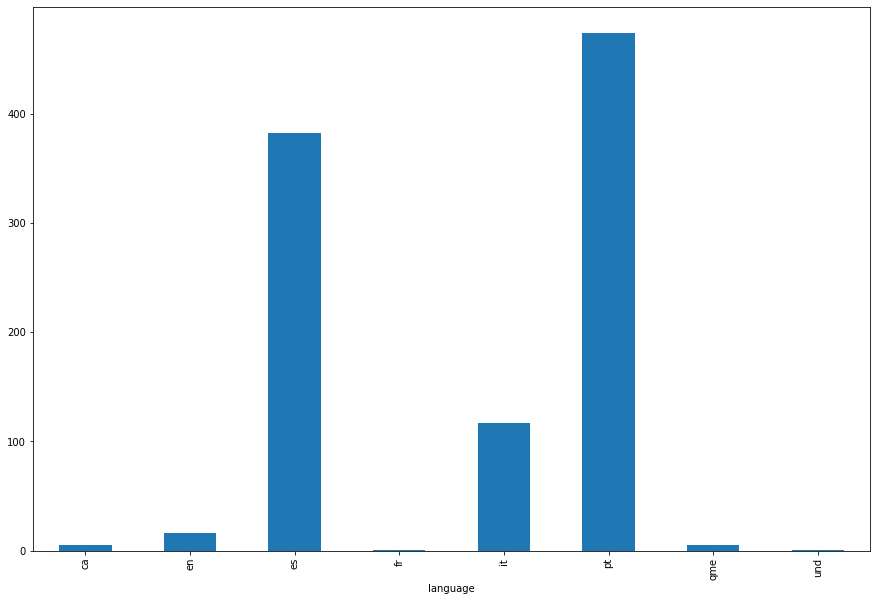

In [18]:
# mostra em tela um gráfico de barras de quantidade de tweets por idioma
df['tweet_id'].groupby(df['language']).count().plot(kind='bar', figsize=(15,10));

### Se caso não for rodar a tradução

In [ ]:
# Se necessário coletar somente tweets de um idioma específico
df = df[df['language'] == 'pt']

# mostra em tela a mudança
df.head()

# Importa bibliotecas de processamento de textos

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
from deep_translator import GoogleTranslator
def translateToPortuguese(instancia):
    translated = GoogleTranslator(source='auto', target='pt').translate(instancia)
    return translated

### Limpa o texto

In [36]:
import re
def cleanText(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

### Tokenização

In [37]:
def tokenizeText(instancia):
    '''
    Recebe o texto e retorna uma lista de tokens.
    '''
    return nltk.tokenize.TweetTokenizer().tokenize(instancia)

### Derivação

In [57]:
nltk.download('rslp')
def stemText(instancia):
    '''
    Recebe uma lista de termos e retorna uma lista stemada.
    '''
    stemmer = nltk.stem.RSLPStemmer()
    words = []
    for w in instancia:
        words.append(stemmer.stem(w))
    return words

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### Lematização

In [68]:
import spacy
nlp = spacy.load('pt_core_news_sm')
def lemmatizeText(instancia):
    palavras = []
    instancia = " ".join(instancia)
    texto = nlp(instancia)
    for p in texto:
        palavras.append(p.lemma_)
    return palavras

### Remoção de STOPWORDS

In [73]:
def removeStopWords(instancia):
    instancia = " ".join(instancia)
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Processa o texto para todas as funções declaradas

In [78]:
df.head()

,datetime,tweet_id,text,language,created_at,clean_text,tokenized,stemmed,lemmatized,processed_text
1000,2022-12-01 14:39:11+00:00,1598325845600485376,Feio até no metaverso.,pt,2020-06-18 14:23:18+00:00,feio até no metaverso,"[feio, até, no, metaverso]","[fei, até, no, metavers]","[fei, até, em o, metaver]",fei metaver
999,2022-12-01 14:39:49+00:00,1598326002798796801,esse bgl de metaverso no insta é mt coisa de t...,pt,2018-04-12 21:01:30+00:00,esse bgl de metaverso no insta é mt coisa de t...,"[esse, bgl, de, metaverso, no, insta, é, mt, c...","[ess, bgl, de, metavers, no, inst, é, mt, cois...","[ess, bgl, de, metaver, em o, inst, ser, mt, c...",ess bgl metaver inst mt cois tio ne
998,2022-12-01 14:40:04+00:00,1598326067508420610,o metaverso é legal pq eu tenho a opção de não...,pt,2022-01-01 22:13:57+00:00,o metaverso é legal pq eu tenho a opção de não...,"[o, metaverso, é, legal, pq, eu, tenho, a, opç...","[o, metavers, é, legal, pq, eu, tenh, a, opç, ...","[o, metaver, ser, legal, pq, eu, tenh, a, opç,...",metaver legal pq tenh opç exist lá difer dess ...
997,2022-12-01 14:40:12+00:00,1598326099670454274,Metaverso ao seu alcance? Conheça as diversas ...,es,2021-10-05 21:18:40+00:00,metaverso ao seu alcance? conheça as diversas ...,"[metaverso, ao, seu, alcance, ?, conheça, as, ...","[metavers, ao, seu, alcanc, ?, conheç, as, div...","[metaver, a o, seu, alcanc, ?, conheç, o, dive...",metaver alcanc ? conheç diver opç dracuvers pe...
996,2022-12-01 14:40:31+00:00,1598326179194355715,5 tendências de marketing digital para 2023\n\...,pt,2022-04-02 10:14:52+00:00,5 tendências de marketing digital para 2023\n\...,"[5, tendências, de, marketing, digital, para, ...","[5, tend, de, marketing, digit, par, 2023, aju...","[5, tend, de, marketing, digit, par, 2023, aju...","5 tend marketing digit par 2023 ajud aí , seg ..."


In [29]:
from tqdm import tqdm
tqdm.pandas()

In [77]:
df['text'] = df.progress_apply(lambda row: translateToPortuguese(row['text']) if row['language'] != 'pt' else row['text'], axis=1)
df['clean_text'] = df.progress_apply(lambda row: cleanText(row['text']), axis=1)
df['tokenized'] = df.progress_apply(lambda row: tokenizeText(row['clean_text']), axis=1)
df['stemmed'] = df.progress_apply(lambda row: stemText(row['tokenized']), axis=1)
df['lemmatized'] = df.progress_apply(lambda row: lemmatizeText(row['stemmed']), axis=1)
df['processed_text'] = df.progress_apply(lambda row: removeStopWords(row['lemmatized']), axis=1)

100%|██████████| 1001/1001 [00:00<00:00, 4101.99it/s]


In [82]:
df.to_csv('/content/drive/MyDrive/Trabalho Mestrado Python/sample_collected_and_processed.csv')

# **1. Importação do dicionário de tweets sobre o metaverso**
# **2. Importação das coleções do twitter sobre o metaverso**

In [83]:
# 1. Dicionário
sample = pd.read_csv('/content/drive/MyDrive/Trabalho Mestrado Python/sample_translated_1000.csv')

# 2. Coleção
collected = pd.read_csv('/content/drive/MyDrive/Trabalho Mestrado Python/sample_collected_and_processed.csv')

Neste momento, temos duas bases de dados:

*   df: contendo os nossos dados coletados do twitter
*   sample: contendo os dados rotulados que serão o nosso dicionário. Utilizaremos este para treinar o algoritmo.

In [81]:
df.columns, sample.columns

(Index(['datetime', 'tweet_id', 'text', 'language', 'created_at', 'clean_text',
        'tokenized', 'stemmed', 'lemmatized', 'processed_text'],
       dtype='object'),
 Index(['Unnamed: 0', 'datetime', 'text_lower', 'textblob_sentiment',
        'portuguese_text'],
       dtype='object'))

# **Análise de Sentimentos**



### Importação das bibliotecas para modelagem



In [84]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

### Conta a quantidade de linhas no dicionário: neutros, potitivos e negativos.

In [85]:
sample['textblob_sentiment'].value_counts()

Positive    478
Neutral     444
Negative     78
Name: textblob_sentiment, dtype: int64

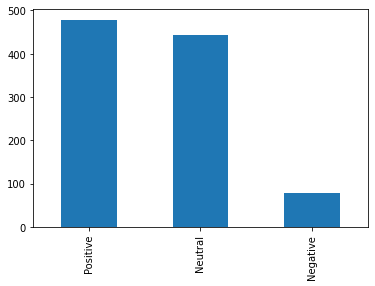

In [87]:
sample['textblob_sentiment'].value_counts().plot(kind='bar')

# **Separando os tweets (textos) e classes (positivo, negativo e neutro)**

In [88]:
tweets = sample['portuguese_text']
classes = sample['textblob_sentiment']

In [90]:
classes

0       Neutral
1      Negative
2      Positive
3      Positive
4      Positive
         ...   
995    Positive
996    Positive
997    Positive
998    Positive
999    Positive
Name: textblob_sentiment, Length: 1000, dtype: object

# Preparo da Vetorização dos dados (Bag of words)

In [93]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=nltk.tokenize.TweetTokenizer().tokenize)

# Aplicação da vetorização nos tweets

In [94]:
freq_tweets = vectorizer.fit_transform(tweets)

# Treino do Modelo (Naive Bayes)

In [95]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

# Contruindo os testes

In [98]:
def preprocessing_entries(instancia):
    instancia = cleanText(instancia)
    instancia = tokenizeText(instancia)
    instancia = stemText(instancia)
    instancia = lemmatizeText(instancia)
    instancia = removeStopWords(instancia)
    return instancia

In [104]:
# defina instâncias de teste dentro de uma lista
testes = [
    'O metaverso está no início, vamos ver o que vai dar',
    'Estou muito feliz com o metaverso, por ser uma plataforma cheia de oportunidades',
    'Não tô gostando dessa idéia de metaverso',
    'Estou preocupado com o metaverso no que diz respeito à segurança',
    'Metaverso é um prodígio para o futuro'
]

In [99]:
testes = [preprocessing_entries(i) for i in testes]

In [105]:
# transforma os testes em vetores de palavras
freq_testes = vectorizer.transform(testes)

In [106]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

O metaverso está no início, vamos ver o que vai dar, Positive
Estou muito feliz com o metaverso, por ser uma plataforma cheia de oportunidades, Positive
Não tô gostando dessa idéia de metaverso, Neutral
Estou preocupado com o metaverso no que diz respeito à segurança, Positive
Metaverso é um prodígio para o futuro, Positive


In [107]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negative' 'Neutral' 'Positive']


array([[0.  , 0.14, 0.86],
       [0.  , 0.  , 1.  ],
       [0.05, 0.58, 0.37],
       [0.  , 0.12, 0.87],
       [0.  , 0.14, 0.86]])

# Criando Pipelines

In [108]:
from sklearn.pipeline import Pipeline

### Pipeline com Naive Bayes

In [130]:
pipeline_naive_bayes = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

### Pipeline com SVM

In [131]:
pipeline_SVM = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

# Validando Modelos com Validação Cruzada Naive Bayes:

### Cross-validation do Modelo Naive Bayes

In [132]:
resultados = cross_val_predict(pipeline_naive_bayes, tweets, classes, cv=10)

### Acurácia do Modelo Naive Bayes

In [133]:
metrics.accuracy_score(classes,resultados)

0.607

Accuracy Score: 60,7%

### Medidas de Validação do Modelo

In [134]:
print(metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03        78
     Neutral       0.74      0.39      0.51       444
    Positive       0.57      0.90      0.70       478

    accuracy                           0.61      1000
   macro avg       0.77      0.44      0.41      1000
weighted avg       0.68      0.61      0.56      1000



### Matriz de Confusão

In [135]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative         1       15        62    78
Neutral          0      175       269   444
Positive         0       47       431   478
All              1      237       762  1000


# Validando Modelos com Validação Cruzada SVM:

### Cross-validation do Modelo Naive Bayes

In [136]:
resultados = cross_val_predict(pipeline_SVM, tweets, classes, cv=10)

### Acurácia do Modelo Naive Bayes

In [137]:
metrics.accuracy_score(classes,resultados)

0.665

Accuracy Score: 66,5%

### Medidas de Validação do Modelo

In [138]:
print(metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negative       0.10      0.04      0.06        78
     Neutral       0.66      0.76      0.70       444
    Positive       0.71      0.68      0.70       478

    accuracy                           0.67      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.64      0.67      0.65      1000



### Matriz de Confusão

In [139]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negative  Neutral  Positive   All
Real                                       
Negative         3       40        35    78
Neutral         11      338        95   444
Positive        17      137       324   478
All             31      515       454  1000


Observação:

*   O modelo SVM separa melhor os valores sentimentos neutros dos positivos

